<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Exploratory Data Analysis

---

### EDA Guide:

- [Data Inspection](#inspection)
- [Distribution of variables by Realized Price](#realizedprice)
- [Comparing Cities](#city)
- [Distribution of Art Period](#artperiod)
- [Price vs Total Prints](#totalprints)
- [Price vs Dimension](#dimensions)
- [Sale Performance over time](#time)
- [Death Factor](#deathfactor)

In [2]:
import pandas as pd
import numpy as np
import re, time
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics

import plotly 
plotly.tools.set_credentials_file(username='Minnie333', api_key='teRaJ9pArTJSMzrC2Vub')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

<a id = "inspection"></a>
### Data Inspection:
---
- Now that I have a clean data set, I will be exploring the data for further insights about the distribution and interesting correlations

In [46]:
art = pd.read_csv('./regression_df.csv')

In [47]:
art.drop(columns = 'Unnamed: 0', inplace = True)

In [48]:
art.head()

,Artist,Art_period,Medium_Class,Signed,Total_prints,Area_dimension,Sale_Year,Sale_Month,Sale_Day,Venue_city,Alive,performance_index,linear_perf_index,Realized_Price
0,Pablo Picasso,CFSCD,29,1,200.0,609.673866,2013,11,9,Tokyo,0,25.134075,17.064246,21179
1,Pablo Picasso,CFSCD,29,1,250.0,400.000000,2013,6,4,Zürich,0,25.134075,17.064246,2000
2,Pablo Picasso,CFSCD,29,1,175.0,756.250000,2013,10,30,London,0,25.134075,17.064246,3000
3,Pablo Picasso,CFSCD,29,0,1.0,96.000000,2013,4,4,New York,0,25.134075,17.064246,1000
4,Pablo Picasso,CFSCD,29,1,50.0,137.953125,2013,6,26,Paris,0,25.134075,17.064246,3000


In [5]:
art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63140 entries, 0 to 63139
Data columns (total 14 columns):
Artist               63140 non-null object
Art_period           63140 non-null object
Medium_Class         63140 non-null int64
Signed               63140 non-null int64
Total_prints         63140 non-null float64
Area_dimension       63140 non-null float64
Sale_Year            63140 non-null int64
Sale_Month           63140 non-null int64
Sale_Day             63140 non-null int64
Venue_city           63140 non-null object
Alive                63140 non-null int64
performance_index    63140 non-null float64
linear_perf_index    63140 non-null float64
Realized_Price       63140 non-null int64
dtypes: float64(4), int64(7), object(3)
memory usage: 6.7+ MB


In [6]:
art.describe()

,Medium_Class,Signed,Total_prints,Area_dimension,Sale_Year,Sale_Month,Sale_Day,Alive,performance_index,linear_perf_index,Realized_Price
count,63140.000000,63140.000000,63140.000000,63140.000000,63140.000000,63140.000000,63140.000000,63140.00000,63140.000000,63140.000000,63140.000000
mean,70.700000,0.886443,112.126940,792.576584,2014.399462,7.041828,17.497054,0.21370,13.167306,9.765816,18377.950523
std,72.274881,0.317275,280.306059,3971.823187,2.808018,3.290697,9.082523,0.40992,14.968529,11.101253,43761.413591
min,0.000000,0.000000,0.000000,0.003790,2009.000000,1.000000,1.000000,0.00000,0.314900,0.226894,0.000000
25%,29.000000,1.000000,6.000000,158.562500,2012.000000,4.000000,9.000000,0.00000,3.118629,2.352974,4375.000000
50%,29.000000,1.000000,55.000000,432.773130,2015.000000,7.000000,19.000000,0.00000,8.430774,6.339543,7500.000000
75%,80.000000,1.000000,120.000000,855.562500,2017.000000,10.000000,26.000000,0.00000,15.153422,11.242282,16250.000000
max,399.000000,1.000000,10000.000000,663613.890625,2019.000000,12.000000,31.000000,1.00000,63.908683,46.722884,996135.000000


In [7]:
art.describe(include='O')

,Artist,Art_period,Venue_city
count,63140,63140,63140
unique,100,9,235
top,Pablo Picasso,Abstract_Expressionism,New York
freq,6339,20774,23399


In [8]:
art.columns

Index(['Artist', 'Art_period', 'Medium_Class', 'Signed', 'Total_prints',
       'Area_dimension', 'Sale_Year', 'Sale_Month', 'Sale_Day', 'Venue_city',
       'Alive', 'performance_index', 'linear_perf_index', 'Realized_Price'],
      dtype='object')

In [49]:
art_corr = pd.get_dummies(art.drop(columns = 'Realized_Price'))

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(art_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
sns.heatmap(art_corr, mask=mask, annot=True, ax=ax)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        c

plt.show()

#### Mean Realized Price of all art work by each artist:

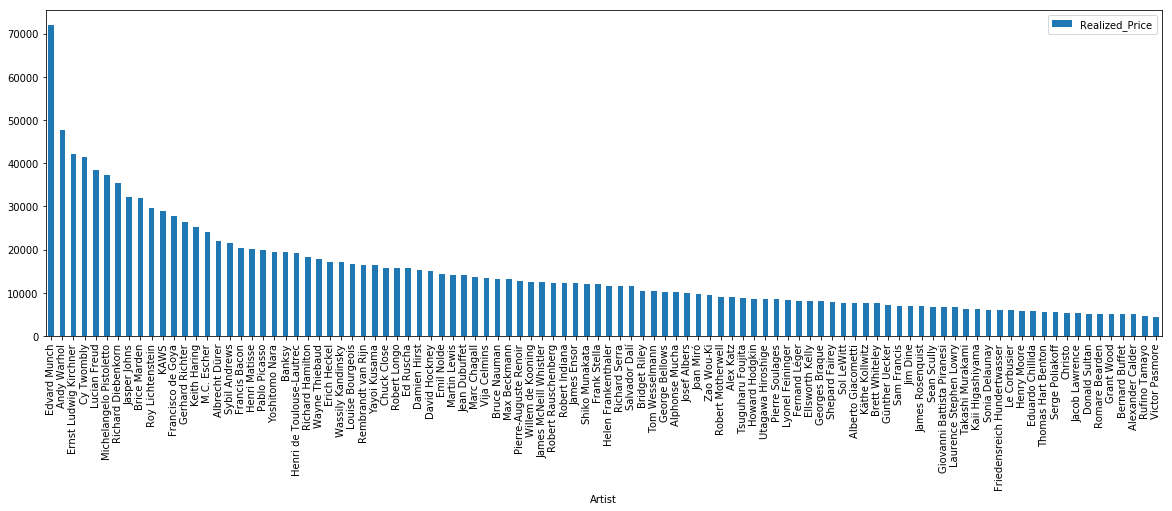

In [13]:
fig, ax = plt.subplots(figsize=(20, 6))
art.groupby('Artist')[['Realized_Price']].mean().sort_values(by = 'Realized_Price', ascending = False).plot(kind ='bar', ax=ax);

In [14]:
grouped_artist = art.groupby('Artist')[['Realized_Price']].mean()
grouped_artist['Count'] = art.groupby('Artist')[['Realized_Price']].count()['Realized_Price']
grouped_artist.rename(columns = {'Realized_Price':'Mean_Price'},inplace = True)

#### Comparing the Mean Realized price with the number of Sale Count for each artist:

In [ ]:
grouped_artist.iplot(
    x='Mean_Price',
    y='Count',
    text = grouped_artist.index.tolist(),
    mode='markers',
    # Log xaxis
    layout=dict(
        xaxis=dict(type='log', title='Mean Price'),
        yaxis=dict(type = 'log',title='Count'),
        title='Artist Mean Price vs Artist Sale Count'))

![](./images_eda/artist_price_count.png)

I will be exploring the distribution of Realized Price below:
- For all artists
- A selection of individual artists
- A selection of cities

### Distribution of realized price for all observations
<a id = "realizedprice"></a>

---
   - It can be seen the realized price is very negatively skewed
   - This was expected as prints were chosen for this project as it is mainly on the lower end of the price spectrum
   - With outliers on the far right where rarer and more valuable pieces are, we will not exclude these as it is important to be able to identify these

In [ ]:
art[['Realized_Price']].iplot(
    kind='hist',
    xTitle='Realized_Price',
    yTitle='Count',
    title='Distribution of Realized Price')

![](./images_eda/realizedprice.png)

#### Distribution of realized price for the top and last 5 artist by count:
   - Similarly when looking at individual artists, the distribution of prices are also positively skewed

In [ ]:
top5artist_bycount = art.Artist.value_counts().head(5).index.tolist()
data = []
for i in top5artist_bycount:
    data.append(go.Box(
    y= art[art.Artist == i]['Realized_Price']
    ))
    
py.iplot(data)

![](./images_eda/topartist_dist.png)

In [ ]:
last5artist_bycount = art.Artist.value_counts().tail(5).index.tolist()
data = []
for i in last5artist_bycount:
    data.append(go.Box(
    y= art[art.Artist == i]['Realized_Price']
    ))
    b
py.iplot(data)

![](./images_eda/lastartist_dist.png)

#### Distribution of realized price for top 5 city venues:
   - Again, positively skewed for individual cities too

In [ ]:
top5venue_bycount = art.Venue_city.value_counts().head(5).index.tolist()
data = []
for i in top5venue_bycount:
    data.append(go.Box(
    y= art[art.Venue_city == i]['Realized_Price']
    ))
    
py.iplot(data)

![](./images_eda/topvenue_dist.png)

In [ ]:
last5venue_bycount = art.Venue_city.value_counts().tail(5).index.tolist()
data = []
for i in last5venue_bycount:
    data.append(go.Box(
    y= art[art.Venue_city == i]['Realized_Price']
    ))
    
py.iplot(data)

![](./images_eda/lastvenue_dist.png)

### Comparing Cities for the highest number of auction sale and the highest mean sale price:
<a id = "city"></a>

---
   - Here we can see something more interesting, the cities with the highest number of auction sales is very different for the cities with the highest mean sale price
   - The cities with the most auction sales are where most of the "traditional" auction houses are based
   - However, the mean price is highest in new emerging markets 
   - This could be either an increase in wealth for these locations so auction houses are targeting the new markets, or theres more "hype" in the new markets and pieces are over-valuated and less conservative in comparison to older more established venues

In [ ]:
art.groupby('Venue_city')[['Realized_Price']].count().sort_values(by='Realized_Price', ascending = False).iplot(
    kind='bar',
    xTitle='Auction Venue by City',
    yTitle='Count',
    title='Auction Venue Distribution by City')

![](./images_eda/city_count.png)

In [ ]:
art.groupby('Venue_city')[['Realized_Price']].mean().sort_values(by = 'Realized_Price', ascending = False).iplot(
    kind='bar',
    xTitle='Auction Venue by City',
    yTitle='Mean Sale Price',
    text = art.groupby('Venue_city')[['Realized_Price']].mean().index.tolist(),
    title='Mean Sale Price per City');

![](./images_eda/city_sale.png)

### Distribution of art period:
<a id = "artperiod"></a>

---

In [ ]:
art[['Art_period']].iplot(
    kind='hist',
    xTitle='Art Period',
    yTitle='Count',
    title='Distribution of Art_Period')

![](./images_eda/artperiod.png)


### Comparison between number of total prints and the realised price of all the artworks in the dataset:
<a id = "totalprints"></a>


---

   - There isn't much correlation, but we can see that if the piece belongs to a set of over 2500 then the realised price will be under $100,000 or less.

In [ ]:
art.iplot(
    x='Realized_Price',
    y='Total_prints',
    mode='markers',
    layout=dict(
        yaxis=dict(title='Total Prints'),
        xaxis=dict(title='Realized Price'),
        title='Total Print vs Realized Price'))

![](./images_eda/totalprints.png)

### Comparison between auction price and the dimension of the art work:
<a id = "dimensions"></a>

---
   - This is done by area, inch squared.
   - One may imagine the bigger the piece of art work the most expensive
   - Yet, it show this is not the case here. Over 30,000 inch**2 the price of the art piece is capped.

In [ ]:
art.iplot(
    x='Area_dimension',
    y='Realized_Price',
    mode='markers',
    # Log xaxis
    layout=dict(
        yaxis=dict(title='Realized Price'),
        xaxis=dict(title='Dimension in inches**2'),
        title='Auction Price vs. Dimension'))

![](./images_eda/dimensions.png)

### Auction Sale Price performance compared with time - year, month, day:
<a id = "time"></a>

---
   - Number of art auction sales has increased over the years which also contributes to the increase in total sum of sale prices
   - Except when comparing the mean sale price there isn't as obvious of a trend.
   - As for comparing distribution and by month from both we can see the preferred dates of big auction events/ auction seasons however the trend for mean auction price is less obvious.

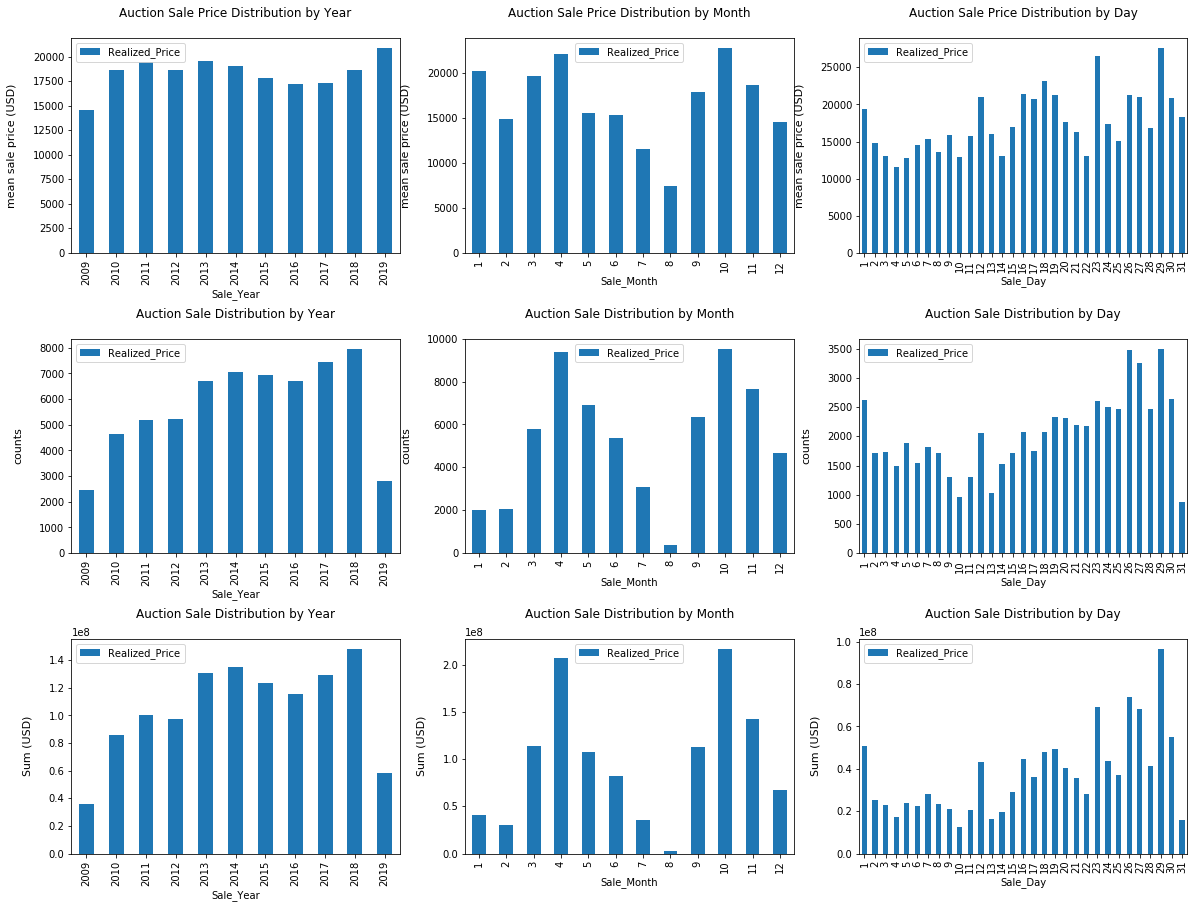

In [20]:
fig, ax = plt.subplots(3,3, figsize=(20, 15))
plt.subplots_adjust(hspace = 0.4)
art.groupby('Sale_Year')[['Realized_Price']].mean().plot(kind ='bar', ax=ax[0][0]);
art.groupby('Sale_Month')[['Realized_Price']].mean().plot(kind ='bar', ax=ax[0][1]);
art.groupby('Sale_Day')[['Realized_Price']].mean().plot(kind ='bar', ax=ax[0][2]);
ax[0][0].set_ylabel('mean sale price (USD)\n', fontsize=11)
ax[0][0].set_title('Auction Sale Price Distribution by Year\n', fontsize=12)
ax[0][1].set_ylabel('mean sale price (USD)\n', fontsize=11)
ax[0][1].set_title('Auction Sale Price Distribution by Month\n', fontsize=12)
ax[0][2].set_ylabel('mean sale price (USD)\n', fontsize=11)
ax[0][2].set_title('Auction Sale Price Distribution by Day\n', fontsize=12);

art.groupby('Sale_Year')[['Realized_Price']].count().plot(kind ='bar', ax=ax[1][0]);
art.groupby('Sale_Month')[['Realized_Price']].count().plot(kind ='bar', ax=ax[1][1]);
art.groupby('Sale_Day')[['Realized_Price']].count().plot(kind ='bar', ax=ax[1][2]);
ax[1][0].set_ylabel('counts\n', fontsize=11)
ax[1][0].set_title('Auction Sale Distribution by Year\n', fontsize=12)
ax[1][1].set_ylabel('counts\n', fontsize=11)
ax[1][1].set_title('Auction Sale Distribution by Month\n', fontsize=12)
ax[1][2].set_ylabel('counts\n', fontsize=11)
ax[1][2].set_title('Auction Sale Distribution by Day\n', fontsize=12);

art.groupby('Sale_Year')[['Realized_Price']].sum().plot(kind ='bar', ax=ax[2][0]);
art.groupby('Sale_Month')[['Realized_Price']].sum().plot(kind ='bar', ax=ax[2][1]);
art.groupby('Sale_Day')[['Realized_Price']].sum().plot(kind ='bar', ax=ax[2][2]);
ax[2][0].set_ylabel('Sum (USD)\n', fontsize=11)
ax[2][0].set_title('Auction Sale Distribution by Year\n', fontsize=12)
ax[2][1].set_ylabel('Sum (USD)\n', fontsize=11)
ax[2][1].set_title('Auction Sale Distribution by Month\n', fontsize=12)
ax[2][2].set_ylabel('Sum (USD)\n', fontsize=11)
ax[2][2].set_title('Auction Sale Distribution by Day\n', fontsize=12);

### The "Death Factor":
<a id = "deathfactor"></a>

---
   - It has been an assumption or myth that the vital status of the artist hugely affects the price of an artwork.
   - It can be shown below that this is not the case. There is a slight difference between the mean price of a dead artist in comparison to an alive artist but only by less than $5000

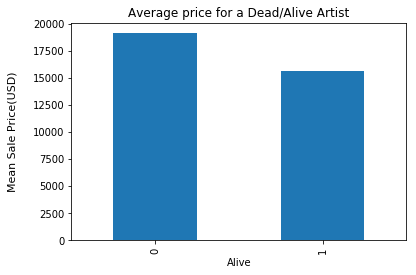

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))
art.groupby('Alive')['Realized_Price'].mean().plot(kind = 'bar', ax=ax)
ax.set_ylabel('Mean Sale Price(USD)\n', fontsize=11)
ax.set_title('Average price for a Dead/Alive Artist', fontsize=12);